In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [4]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['feature1','feature2']].values

In [8]:
y= df['price'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
X_train.shape

(700, 2)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [43]:
X_train = scaler.transform(X_train)

In [44]:
X_test = scaler.transform(X_test)

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [47]:
model = Sequential ()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimzer='rmsprop', loss='mse' )

In [48]:
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 0s 646us/sample - loss: 256616.1220
Epoch 2/250
700/700 [==============================] - 0s 57us/sample - loss: 256507.8080
Epoch 3/250
700/700 [==============================] - 0s 54us/sample - loss: 256393.9021
Epoch 4/250
700/700 [==============================] - 0s 52us/sample - loss: 256264.2246
Epoch 5/250
700/700 [==============================] - 0s 53us/sample - loss: 256115.3459
Epoch 6/250
700/700 [==============================] - 0s 55us/sample - loss: 255944.3560
Epoch 7/250
700/700 [==============================] - 0s 50us/sample - loss: 255749.1307
Epoch 8/250
700/700 [==============================] - 0s 47us/sample - loss: 255529.7241
Epoch 9/250
700/700 [==============================] - 0s 49us/sample - loss: 255283.9509
Epoch 10/250
700/700 [==============================] - 0s 47us/sample - loss: 255012.4822
Epoch 11/250
700/700 [==============================] - 0s 45us/sample - loss

In [49]:
loss_df = pd.DataFrame(model.history.history)

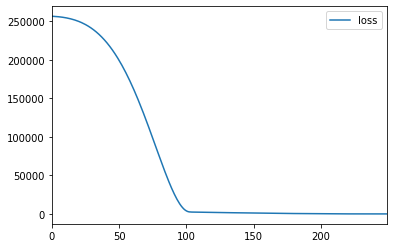

In [50]:
loss_df.plot()

In [51]:
model.evaluate(X_train,y_train,verbose=0)

24.409352242606026

In [52]:
model.evaluate(X_test,y_test,verbose=0)

25.39920435587565

In [53]:
test_prediction = model.predict(X_test)

In [54]:
test_prediction

array([[405.78427],
       [622.7029 ],
       [591.3427 ],
       [572.03094],
       [367.9754 ],
       [578.7069 ],
       [515.4885 ],
       [459.02734],
       [549.1789 ],
       [447.46045],
       [611.0054 ],
       [547.9415 ],
       [419.55792],
       [409.48932],
       [649.5816 ],
       [437.4218 ],
       [507.79785],
       [659.4102 ],
       [661.73926],
       [564.80457],
       [335.47852],
       [445.1262 ],
       [383.39795],
       [379.38345],
       [566.1502 ],
       [610.1639 ],
       [532.2036 ],
       [428.15814],
       [654.78516],
       [414.27646],
       [442.6612 ],
       [485.1334 ],
       [438.66016],
       [680.94147],
       [424.72385],
       [418.37106],
       [501.16153],
       [550.03296],
       [510.0755 ],
       [396.5094 ],
       [617.6469 ],
       [416.87073],
       [603.6146 ],
       [445.76193],
       [501.906  ],
       [580.45105],
       [667.3828 ],
       [490.13397],
       [319.31778],
       [485.49335],


In [82]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])
test_prediction = pd.Series(test_prediction.values.reshape(300,))

In [83]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [84]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [91]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [86]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [92]:
pred_df = pd.concat([pred_df,test_prediction],axis=1)

In [93]:
pred_df

,Test True Y,0
0,402.296319,405.784271
1,624.156198,622.702881
2,582.455066,591.342712
3,578.588606,572.030945
4,371.224104,367.975403
...,...,...
295,525.704657,529.065002
296,502.909473,516.180603
297,612.727910,608.828430
298,417.569725,417.083038


In [96]:
pred_df.columns=['Test True Y', 'Model Prediction']

In [97]:
pred_df

,Test True Y,Model Prediction
0,402.296319,405.784271
1,624.156198,622.702881
2,582.455066,591.342712
3,578.588606,572.030945
4,371.224104,367.975403
...,...,...
295,525.704657,529.065002
296,502.909473,516.180603
297,612.727910,608.828430
298,417.569725,417.083038


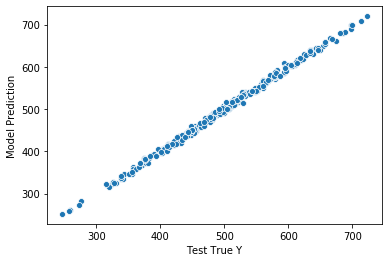

In [98]:
sns.scatterplot(x='Test True Y', y='Model Prediction', data=pred_df)

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [101]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Prediction'])

4.070072218534513

In [102]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Prediction'])

25.399208722811085

In [103]:
new_gem = [[998, 1000]]

In [105]:
new_gem = scaler.transform(new_gem)

In [106]:
model.predict(new_gem)

array([[420.67737]], dtype=float32)

In [107]:
from tensorflow.keras.models import load_model

In [108]:
model.save('my_gem_model.h5')